In [1]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt

dir_path='C:/Users/User/Documents/application_train.csv'
f_train=os.path.join(dir_path)
app_train=pd.read_csv(f_train)
app_train.shape

(307511, 122)

In [2]:
# 將只有兩種值的類別行欄位，作label encoder，並計算相關係數
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# 檢查欄位每一個 item 
for col in app_train:
    if app_train[col].dtype=='object':
        if len(list(app_train[col].unique())) <=2: #只有兩種值的類別行欄位 <=2
               #作label encoder 
                app_train[col]=le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 將受雇日脂異常資料，另存為新的欄位，並賦予空值
app_train['DAYS_EMPLOYED_ANOM']=app_train['DAYS_EMPLOYED']==365243
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
print(app_train['DAYS_EMPLOYED_ANOM'])

# 將出生日數曲絕對值
app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED_ANOM, Length: 307511, dtype: bool


In [4]:
# 計算相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

In [5]:
# 排序，從最大到最小的各15筆資料相關性顯示
correlations=app_train.corr()['TARGET'].sort_values()
print('Most positive correlations:\n',correlations.tail(15))
print('\nMost negative correlations:\n',correlations.head(15))

Most positive correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most positive correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


In [6]:
# 作圖觀察其相關性
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

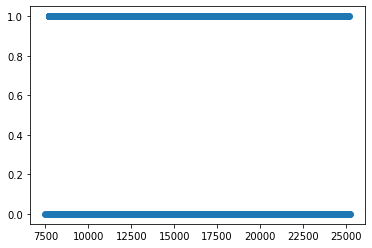

In [7]:
plt.scatter(app_train['DAYS_BIRTH'],app_train['TARGET'])

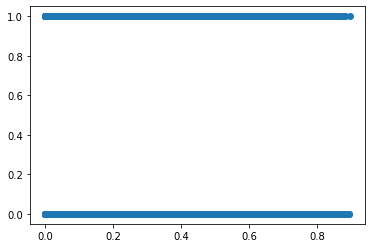

In [9]:
plt.scatter(app_train['EXT_SOURCE_3'],app_train['TARGET'])

-0.1789186976283708


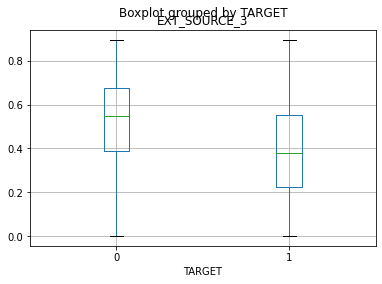

In [10]:
app_train.boxplot(by='TARGET',column='EXT_SOURCE_3')
print(app_train['EXT_SOURCE_3'].corr(app_train['TARGET']))